In [2]:
import numpy as np
import sacc
import pyccl as ccl
import os
import sys
sys.path.append('../code/LSSLike/hsc/')
sys.path.append('../code/LSSLike/desclss/')
from hsc_driver import HSCAnalyze
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import copy

%matplotlib inline

In [3]:
matplotlibrc = 'normal'

In [4]:
if matplotlibrc == 'normal':
    matplotlib.rcParams['lines.linewidth'] = 1.
    matplotlib.rcParams['lines.linestyle'] = '-'  
    matplotlib.rcParams['lines.color'] = 'black'

    #fonts & text
    matplotlib.rcParams['font.family'] = 'serif'
    matplotlib.rcParams['font.weight'] = 'normal'
    matplotlib.rcParams['font.size'] = 12.0
    matplotlib.rcParams['text.color'] = 'black'
    matplotlib.rcParams['text.usetex'] = True

    #axes & ticks
    matplotlib.rcParams['axes.edgecolor'] = 'black'
    matplotlib.rcParams['axes.linewidth'] = 1.6
    matplotlib.rcParams['axes.grid'] = False
    matplotlib.rcParams['axes.titlesize'] = 'x-large'
    matplotlib.rcParams['axes.labelsize'] = 32
    matplotlib.rcParams['axes.labelweight'] = 'normal'
    matplotlib.rcParams['axes.labelcolor'] = 'black'
    matplotlib.rcParams['axes.formatter.limits'] = [-4, 4]

    matplotlib.rcParams['xtick.major.size'] = 7
    matplotlib.rcParams['xtick.minor.size'] = 4
    matplotlib.rcParams['xtick.major.pad'] = 6
    matplotlib.rcParams['xtick.minor.pad'] = 6
    matplotlib.rcParams['xtick.labelsize'] = 32
    matplotlib.rcParams['xtick.minor.width'] = 1.6
    matplotlib.rcParams['xtick.major.width'] = 1.6

    matplotlib.rcParams['ytick.major.size'] = 7
    matplotlib.rcParams['ytick.minor.size'] = 4
    matplotlib.rcParams['ytick.major.pad'] = 6
    matplotlib.rcParams['ytick.minor.pad'] = 6
    matplotlib.rcParams['ytick.labelsize'] = 32
    matplotlib.rcParams['ytick.minor.width'] = 1.6
    matplotlib.rcParams['ytick.major.width'] = 1.6

    #legends
    matplotlib.rcParams['legend.numpoints'] = 1
    matplotlib.rcParams['legend.fontsize'] = 32
    matplotlib.rcParams['legend.shadow'] = False
    matplotlib.rcParams['legend.frameon'] = False

    matplotlib.rcParams['figure.autolayout'] = True

elif matplotlibrc == 'bold':
    matplotlib.rcParams['patch.linewidth'] = 2

    #fonts & text
    matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
    matplotlib.rcParams['font.family'] = 'serif'
    matplotlib.rcParams['font.weight'] = 'bold'
    matplotlib.rcParams['font.size'] = 12.0
    matplotlib.rcParams['text.color'] = 'black'
    matplotlib.rcParams['text.usetex'] = True

    #axes & ticks
    matplotlib.rcParams['axes.edgecolor'] = 'black'
    matplotlib.rcParams['axes.linewidth'] = 1.5  
    matplotlib.rcParams['axes.grid'] = False
    matplotlib.rcParams['axes.titlesize'] = 25
    matplotlib.rcParams['axes.labelsize'] = 35
    # matplotlib.rcParams['xaxis.labelpad'] = 8
    # matplotlib.rcParams['yaxis.labelpad'] = 10
    matplotlib.rcParams['axes.labelweight'] = 'bold'
    matplotlib.rcParams['axes.labelcolor'] = 'black'
    matplotlib.rcParams['axes.formatter.limits'] = [-4, 4]

    matplotlib.rcParams['xtick.major.size'] = 9
    matplotlib.rcParams['xtick.minor.size'] = 6
    matplotlib.rcParams['xtick.major.pad'] = 6
    matplotlib.rcParams['xtick.minor.pad'] = 6
    matplotlib.rcParams['xtick.labelsize'] = 33
    matplotlib.rcParams['xtick.minor.width'] = 2
    matplotlib.rcParams['xtick.major.width'] = 2

    matplotlib.rcParams['ytick.major.size'] = 9
    matplotlib.rcParams['ytick.minor.size'] = 6
    matplotlib.rcParams['ytick.major.pad'] = 6
    matplotlib.rcParams['ytick.minor.pad'] = 6
    matplotlib.rcParams['ytick.labelsize'] = 33
    matplotlib.rcParams['ytick.minor.width'] = 2
    matplotlib.rcParams['ytick.major.width'] = 2

    #legends
    matplotlib.rcParams['legend.numpoints'] = 1
    matplotlib.rcParams['legend.fontsize'] = 30
    matplotlib.rcParams['legend.shadow'] = False
    matplotlib.rcParams['legend.frameon'] = False

    matplotlib.rcParams['figure.autolayout'] = True
    
else:
    raise NotImplementedError()

In [5]:
colors = ['#e3a19c', '#85a1ca', '#596d82', '#725e9c', '#3d306b', '#AE7182']

### Plot specifications

In [6]:
plot_corr = 'all'
weightpow = 1.3
mode = '1h-2h-split'
logscale = False
savefig = False # If savefig = True, also define plot_suffix
# plot_suffix = 'bla'

### Paths

In [7]:
path2saccs = '/tigress/anicola/DATA/HSC-LSS/HSC_processed/data/'

path2figs = '/home/anicola/WORK/HSC-LSS/plots/'

path2cov = '/tigress/anicola/DATA/HSC-LSS/HSC_processed/analysis/i24p5_CovAna_NoiAna_MskSirius_ClFitHODEvol_Dpj0_DpjBands1_newCov/cov'

In [8]:
saccfiles = [os.path.join(path2saccs, 'WIDE_GAMA15H_sirius_i24p5_out/CovAna_NoiAna_MskSirius_ClFit_Dpj0_DpjBands1_newCov/power_spectra_wdpj.sacc'), \
             os.path.join(path2saccs, 'WIDE_GAMA09H_sirius_i24p5_out/CovAna_NoiAna_MskSirius_ClFit_Dpj0_DpjBands1_newCov/power_spectra_wdpj.sacc'), \
             os.path.join(path2saccs, 'WIDE_VVDS_sirius_i24p5_out/CovAna_NoiAna_MskSirius_ClFit_Dpj0_DpjBands1_newCov/power_spectra_wdpj.sacc'), \
             os.path.join(path2saccs, 'WIDE_WIDE12H_sirius_i24p5_out/CovAna_NoiAna_MskSirius_ClFit_Dpj0_DpjBands1_newCov/power_spectra_wdpj.sacc'), \
             os.path.join(path2saccs, 'WIDE_XMMLSS_sirius_i24p5_out/CovAna_NoiAna_MskSirius_ClFit_Dpj0_DpjBands1_newCov/power_spectra_wdpj.sacc')]

## HSC analyze

In [9]:
import hsc_driver
reload(hsc_driver)
from hsc_driver import HSCAnalyze

../code/LSSLike/hsc/hsc_driver.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib64/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib64/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/anicola/WORK/HSC-LSS/code/venvs/hsc_lss_gen_tracers_venv/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/anicola/WORK/HSC-LSS/code/venvs/hsc_lss_gen_tracers_venv/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/anicola/WORK/HSC-LSS/code/venvs/hsc_lss_gen_tracers_venv/lib/pyth

In [10]:
zeff = np.array([0.57, 0.70, 0.92, 1.25])

Oc = 0.264
FID_HOD_PARAMS = np.array([Oc, 12.46367757, 0., 0.4, 0., 10**13.91595228, 0., 10**14.11005243, 0., 1., 0., 0.25, 0., 0.65])

HSCanalys_no_mag = HSCAnalyze(saccfiles, Oc=Oc, bias=np.ones(zeff.shape[0]), hodpars=FID_HOD_PARAMS, noise=None, \
                       fitNoise=False, lmin=[0, 0, 0, 0], lmax='kmax', kmax=1., zeff=zeff, \
                       fitBias=False, fitHOD=1, hod=1, BiasMod='const', cull_cross=False)

saccs = HSCanalys_no_mag.saccs
saccs_noise = HSCanalys_no_mag.saccs_noise

sacc = saccs[0]
sacc_noise = saccs_noise[0]

INFO: Called hsc_driver with saccfiles = ['/tigress/anicola/DATA/HSC-LSS/HSC_processed/data/WIDE_GAMA15H_sirius_i24p5_out/CovAna_NoiAna_MskSirius_ClFit_Dpj0_DpjBands1_newCov/power_spectra_wdpj.sacc', '/tigress/anicola/DATA/HSC-LSS/HSC_processed/data/WIDE_GAMA09H_sirius_i24p5_out/CovAna_NoiAna_MskSirius_ClFit_Dpj0_DpjBands1_newCov/power_spectra_wdpj.sacc', '/tigress/anicola/DATA/HSC-LSS/HSC_processed/data/WIDE_VVDS_sirius_i24p5_out/CovAna_NoiAna_MskSirius_ClFit_Dpj0_DpjBands1_newCov/power_spectra_wdpj.sacc', '/tigress/anicola/DATA/HSC-LSS/HSC_processed/data/WIDE_WIDE12H_sirius_i24p5_out/CovAna_NoiAna_MskSirius_ClFit_Dpj0_DpjBands1_newCov/power_spectra_wdpj.sacc', '/tigress/anicola/DATA/HSC-LSS/HSC_processed/data/WIDE_XMMLSS_sirius_i24p5_out/CovAna_NoiAna_MskSirius_ClFit_Dpj0_DpjBands1_newCov/power_spectra_wdpj.sacc'].
/home/anicola/WORK/HSC-LSS/code/venvs/hsc_lss_gen_tracers_venv/lib/python2.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecat

Parameters updated: hodpars = {'sigm_1': 0.4, 'sigm_0': 0.0, 'alpha_0': 0.0, 'fc_1': 0.25, 'lmmin': 12.46367757, 'fc_0': 0.0, 'm1p': 0.0, 'zfid': 0.0, 'm1': 128840508441118.05, 'm0': 82404756421877.19, 'm0p': 0.0, 'alpha_1': 1.0, 'lmminp': 0.264}.


INFO: dofs = 80.


## Fiducial model

In [11]:
cls_list = np.load('cls_list_best_fit_no-mag-bias.npy', allow_pickle=True)
cls_1h_list = np.load('cls_list_best_fit_no-mag-bias_1h.npy', allow_pickle=True)
cls_2h_list = np.load('cls_list_best_fit_no-mag-bias_2h.npy', allow_pickle=True)

/home/anicola/WORK/HSC-LSS/code/venvs/hsc_lss_gen_tracers_venv/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


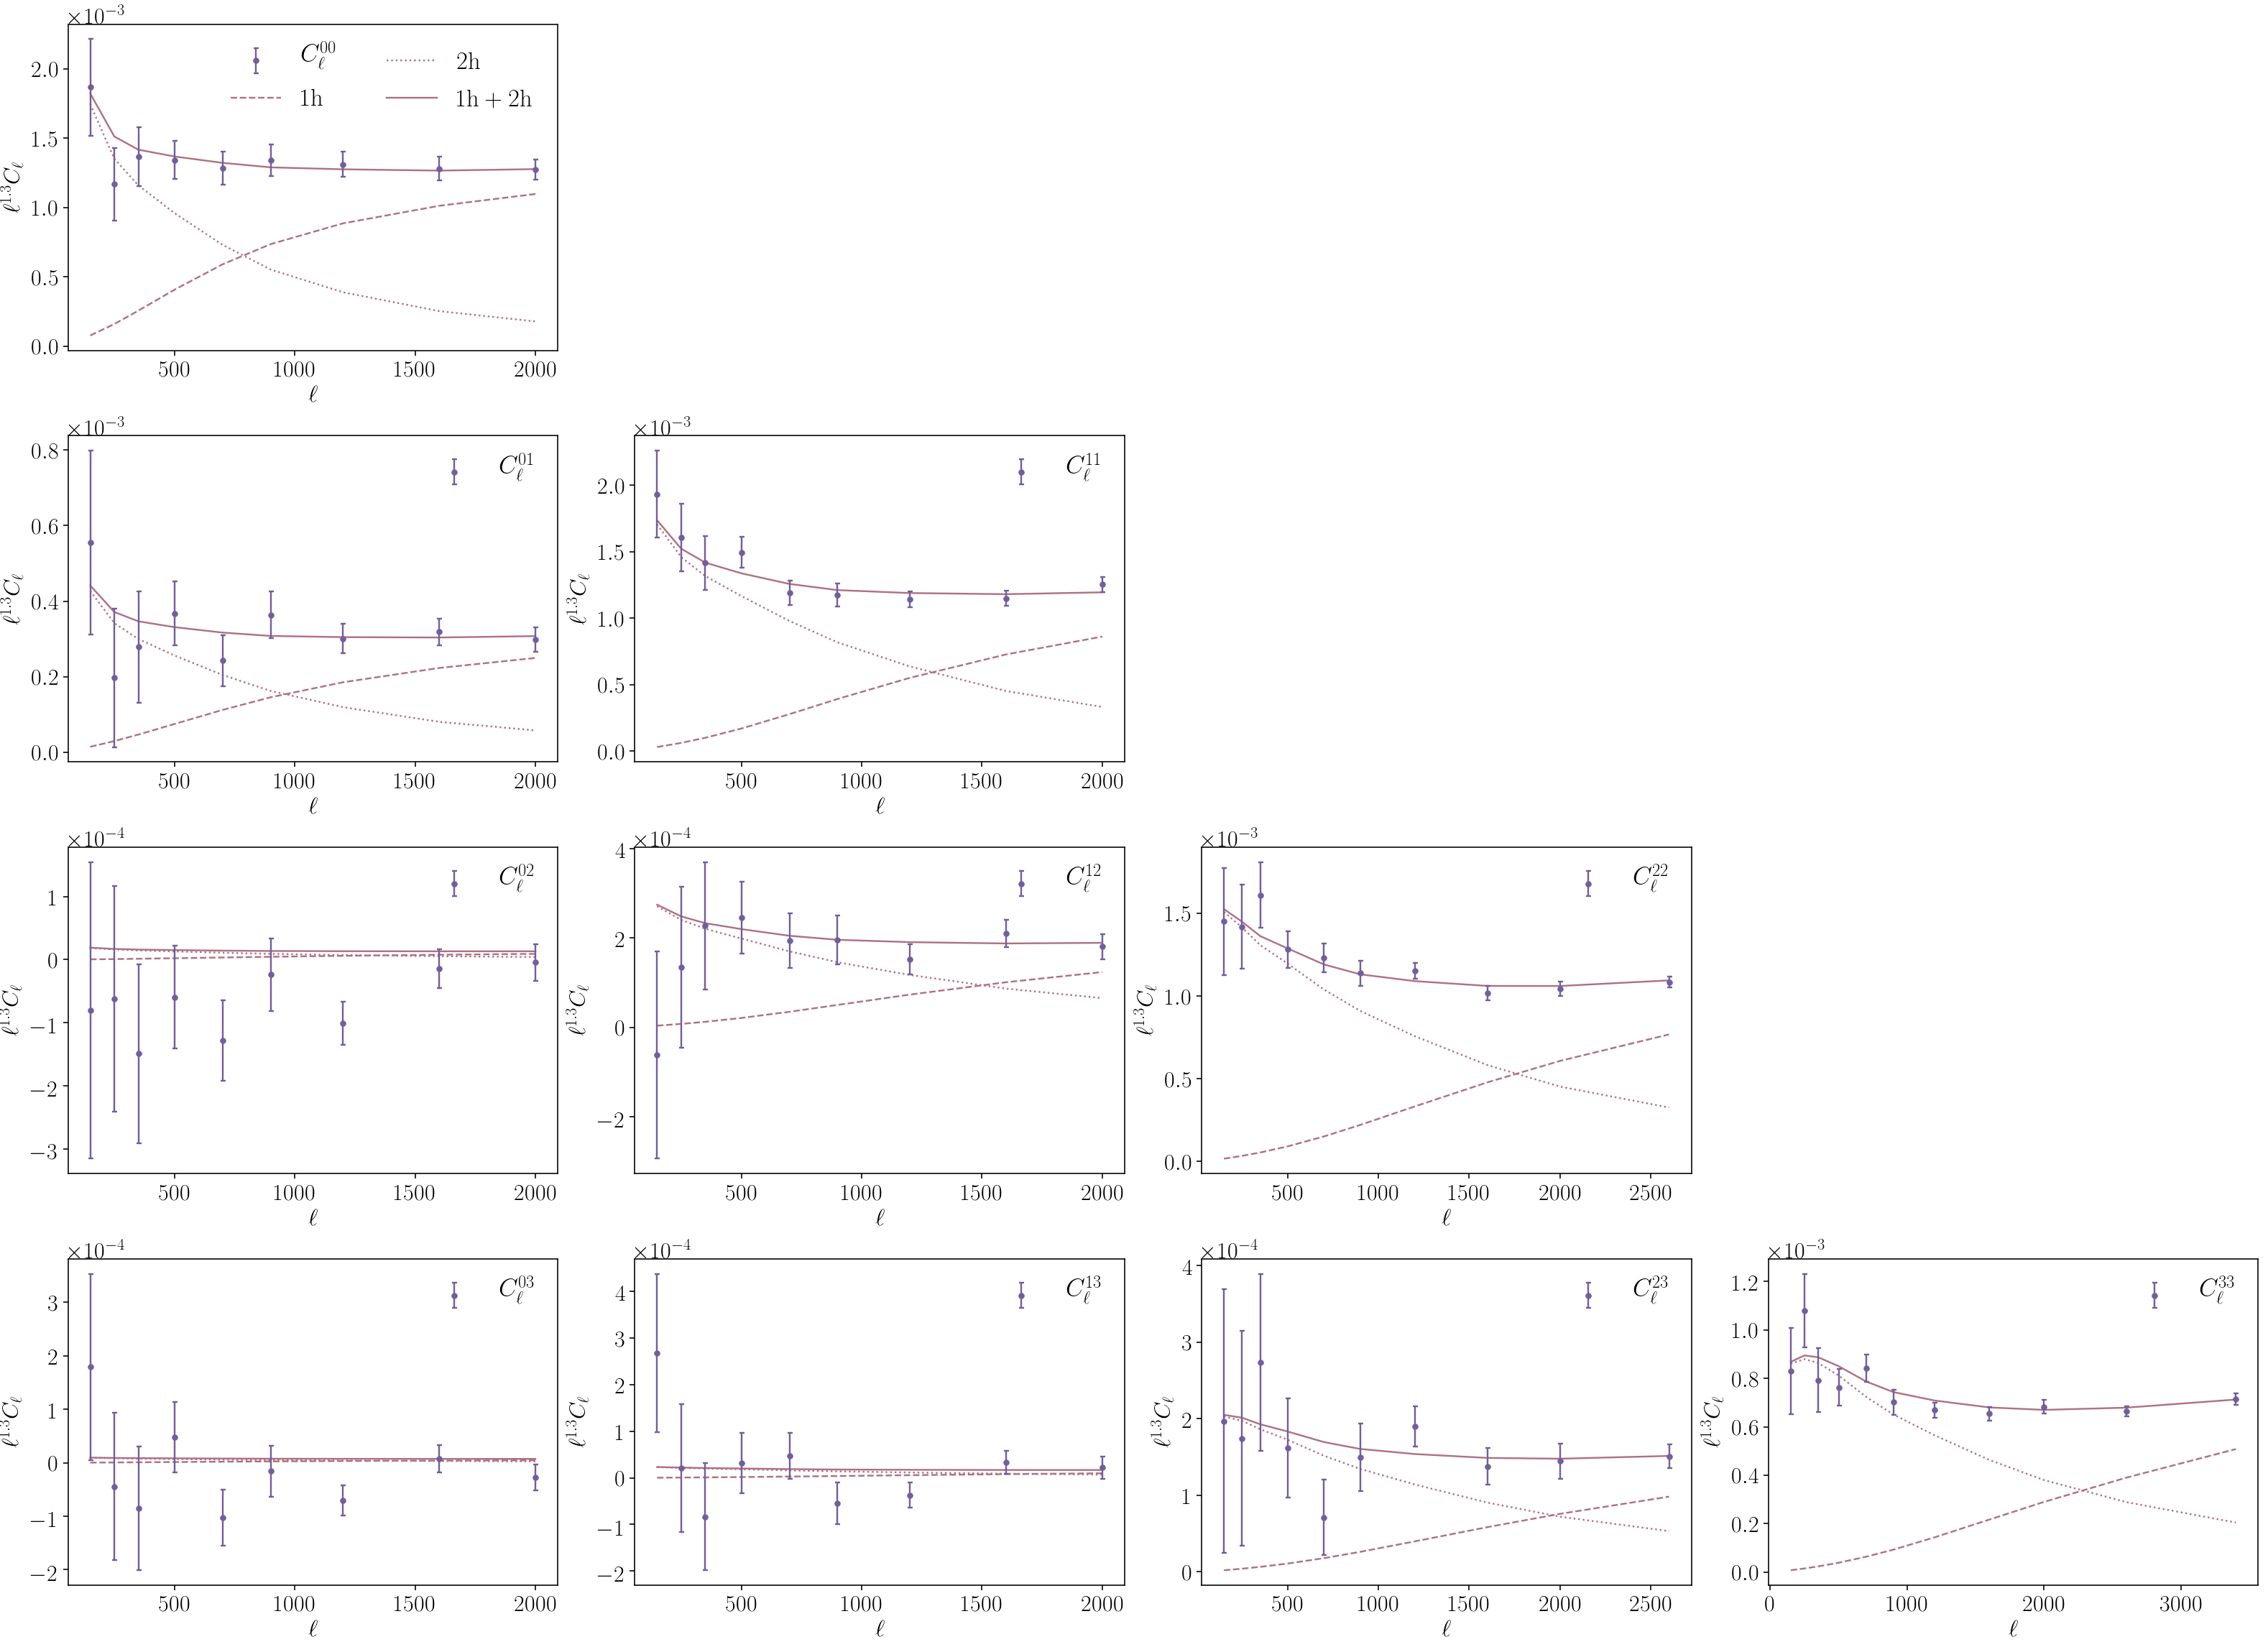

In [12]:
if sacc.precision is not None:
    covmat = np.load(os.path.join(path2cov, 'covmat_HSC_dg_hoddg_hodxdg_hoddg_hod_trisp=4h3h2h_SSC=PT-resp_mode=LINBIAS_l=ells_eff_all_wcross_clfit=HOD-zevol_culled=True_coadd=area_G+NG+SSC.npy'))
    errs=np.sqrt(np.diag(covmat))
else:
    errs=None

plot_cross = False
plot_auto = False
plot_pairs = []

if plot_corr == 'all':
    # Plot the auto-correlation and the cross-correlation
    plot_cross = True
    plot_auto = True
elif plot_corr == 'cross':
    # Plot ALL cross-correlations only
    plot_cross = True
elif plot_corr == 'auto':
    # Plot the auto-correlation only
    plot_auto = True
elif hasattr(plot_corr, '__iter__'):
    plot_pairs = plot_corr
else:
    print('plot_corr needs to be \'all\', \'auto\',\'cross\', or a list of pairs of values.')

tracer_array = np.arange(len(sacc.tracers))
if plot_cross:
    i = 0
    for tr_i in tracer_array:
        for tr_j in tracer_array[i+1:]:
            # Generate the appropriate list of tracer combinations to plot
            plot_pairs.append([tr_i, tr_j])
        i += 1

if plot_auto:
    for tr_i in tracer_array:
        plot_pairs.append([tr_i, tr_i])

plot_pairs = np.array(plot_pairs)

fig = plt.figure(figsize=(44, 32))
gs = gridspec.GridSpec(4, 4)

for i, (tr_i, tr_j) in enumerate(plot_pairs):

    ax = plt.subplot(gs[tr_j, tr_i])

    tbin = np.logical_and(sacc.binning.binar['T1']==tr_i,sacc.binning.binar['T2']==tr_j)
    ell = sacc.binning.binar['ls'][tbin]
    C_ell = sacc.mean.vector[tbin]
    
    cls_no_mag = cls_list[i]
    cls_no_mag_1h = cls_1h_list[i]
    cls_no_mag_2h = cls_2h_list[i]
    
    if tr_i == tr_j:
        C_ell_sn = sacc_noise.mean.vector[tbin]
        C_ell -= C_ell_sn

    if errs is not None:
        ax.errorbar(ell,C_ell * np.power(ell,weightpow),yerr=errs[tbin]*np.power(ell,weightpow), color=colors[3], \
                    linestyle='None', marker='.', markersize=15, elinewidth=2.4, capthick=2.4, capsize=3.5, \
                    label=r'$C_{\ell}^{%i%i}$' %(tr_i,tr_j))
    else:
        ax.plot(ell,C_ell * np.power(ell,weightpow),linestyle='None', marker='o', markeredgecolor=colors[3], \
                color=colors[i], label=r'$C_{\ell}^{%i%i}$' %(tr_i,tr_j))
    if tr_i == 0 and tr_j == 0:
        if mode == '1h-2h-split':
            ax.plot(ell, cls_no_mag_1h * np.power(ell,weightpow), color=colors[-1], \
                label=r'$1\mathrm{h}$', lw=2.4,zorder=-32, linestyle='--')
            ax.plot(ell, cls_no_mag_2h * np.power(ell,weightpow), color=colors[-1], \
                label=r'$2\mathrm{h}$', lw=2.4,zorder=-32, linestyle=':')
            ax.plot(ell, cls_no_mag * np.power(ell,weightpow), color=colors[-1], \
                label=r'$1\mathrm{h}+2\mathrm{h}$', lw=2.4,zorder=-32)
        elif mode == '1h+2h':
            ax.plot(ell, cls_no_mag * np.power(ell,weightpow), color=colors[-1], lw=2.4, zorder=-32)
        else:
            raise NotImplementedError()

    else:
        if mode == '1h-2h-split': 
            ax.plot(ell, cls_no_mag * np.power(ell,weightpow), color=colors[-1], lw=2.4,zorder=-32)
            ax.plot(ell, cls_no_mag_1h * np.power(ell,weightpow), color=colors[-1], lw=2.4,zorder=-32, linestyle='--')
            ax.plot(ell, cls_no_mag_2h * np.power(ell,weightpow), color=colors[-1], lw=2.4,zorder=-32, linestyle=':') 
        elif mode == '1h+2h':
            ax.plot(ell, cls_no_mag * np.power(ell,weightpow), color=colors[-1], lw=2.4, zorder=-32)
        else:
            raise NotImplementedError()

    ax.set_xlabel(r'$\ell$')
    if weightpow == 0:
        elltext = ''
    elif weightpow == 1:
        elltext = r'$\ell$'
    else:
        elltext = r'$\ell^{{{}}}$'.format(weightpow)
    ax.set_ylabel(elltext + r'$C_{\ell}$')
    
    if tr_i == 0 and tr_j == 0:
        if mode == '1h-2h-split': 
            handles,labels = ax.get_legend_handles_labels()
            handles = [handles[3], handles[0], handles[1], handles[2]]
            labels = [labels[3], labels[0], labels[1], labels[2]]
            ax.legend(handles,labels, loc='best', prop={'size':35}, ncol=2)
        else:
            ax.legend(loc='best', prop={'size':35})
    else:
        ax.legend(loc='best', prop={'size':35})
        
    ax.ticklabel_format(style='sci',scilimits=(-1,4),axis='both')
    
    if logscale:
        ax.set_xscale('log')
        ax.set_yscale('log')

if savefig:
    plt.savefig(os.path.join(path2figs, 'Cls-data-vs-best-fit_{}.pdf'.format(plot_suffix)), bbox_inches = "tight")

## No magnification vs. magnification

In [13]:
cls_no_mag_list = np.load('cls_list_best_fit_no-mag-bias.npy', allow_pickle=True)
cls_mag_list = np.load('cls_list_best_fit_mag-bias.npy', allow_pickle=True)

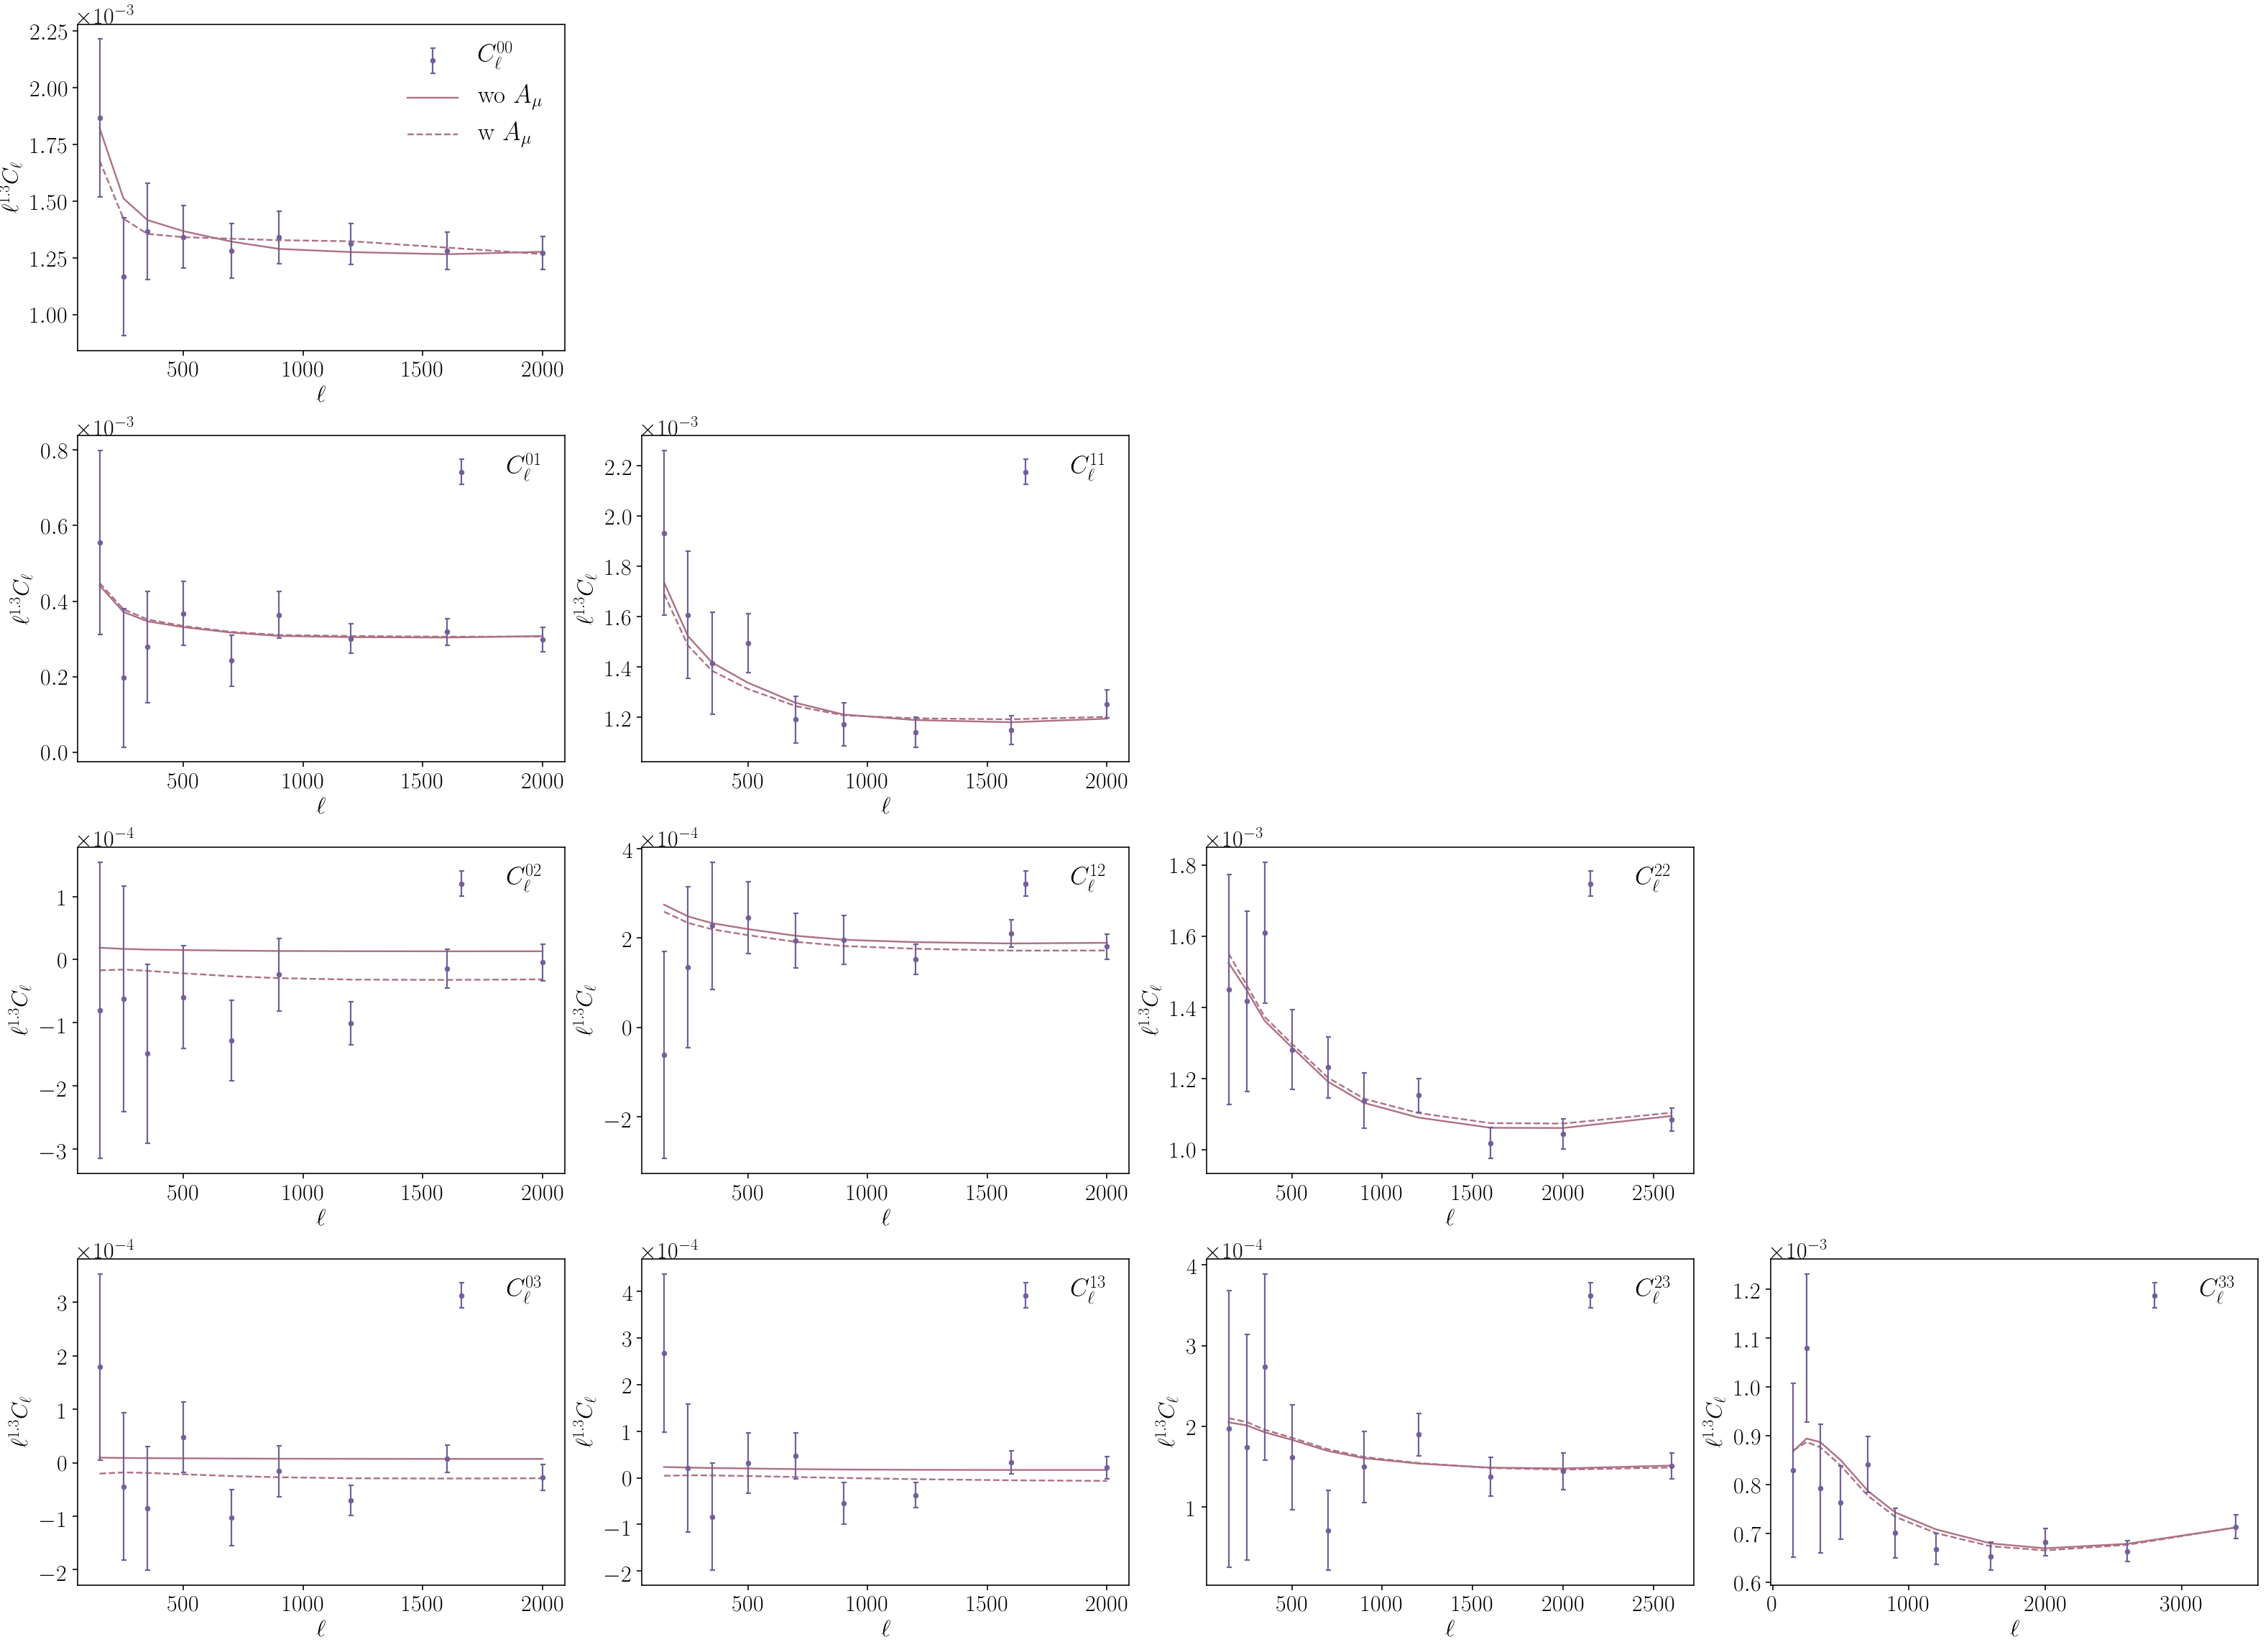

In [15]:
if sacc.precision is not None:
    covmat = np.load(os.path.join(path2cov, 'covmat_HSC_dg_hoddg_hodxdg_hoddg_hod_trisp=4h3h2h_SSC=PT-resp_mode=LINBIAS_l=ells_eff_all_wcross_clfit=HOD-zevol_culled=True_coadd=area_G+NG+SSC.npy'))
    errs=np.sqrt(np.diag(covmat))
else:
    errs=None

plot_cross = False
plot_auto = False
plot_pairs = []

if plot_corr == 'all':
    # Plot the auto-correlation and the cross-correlation
    plot_cross = True
    plot_auto = True
elif plot_corr == 'cross':
    # Plot ALL cross-correlations only
    plot_cross = True
elif plot_corr == 'auto':
    # Plot the auto-correlation only
    plot_auto = True
elif hasattr(plot_corr, '__iter__'):
    plot_pairs = plot_corr
else:
    print('plot_corr needs to be \'all\', \'auto\',\'cross\', or a list of pairs of values.')

tracer_array = np.arange(len(sacc.tracers))
if plot_cross:
    i = 0
    for tr_i in tracer_array:
        for tr_j in tracer_array[i+1:]:
            # Generate the appropriate list of tracer combinations to plot
            plot_pairs.append([tr_i, tr_j])
        i += 1

if plot_auto:
    for tr_i in tracer_array:
        plot_pairs.append([tr_i, tr_i])

plot_pairs = np.array(plot_pairs)

fig = plt.figure(figsize=(44, 32))
gs = gridspec.GridSpec(4, 4)

for i, (tr_i, tr_j) in enumerate(plot_pairs):

    ax = plt.subplot(gs[tr_j, tr_i])

    tbin = np.logical_and(sacc.binning.binar['T1']==tr_i,sacc.binning.binar['T2']==tr_j)
    ell = sacc.binning.binar['ls'][tbin]
    C_ell = sacc.mean.vector[tbin]
    
    cls_no_mag = cls_no_mag_list[i]
    cls_mag = cls_mag_list[i]
    
    if tr_i == tr_j:
        C_ell_sn = sacc_noise.mean.vector[tbin]
        C_ell -= C_ell_sn

    if errs is not None:
        ax.errorbar(ell,C_ell * np.power(ell,weightpow),yerr=errs[tbin]*np.power(ell,weightpow), color=colors[3], \
                    linestyle='None', marker='.', markersize=13, elinewidth=2.2, capthick=2.2, capsize=3.5, label=r'$C_{\ell}^{%i%i}$' %(tr_i,tr_j))
    else:
        ax.plot(ell,C_ell * np.power(ell,weightpow),linestyle='None', marker='o', markeredgecolor=colors[3], color=colors[i],
            label=r'$C_{\ell}^{%i%i}$' %(tr_i,tr_j))
    if tr_i == 0 and tr_j == 0:
        ax.plot(ell, cls_no_mag * np.power(ell,weightpow), color=colors[-1], \
            label=r'$\mathrm{wo}$ $A_{\mu}$', lw=2.4,zorder=-32)
        ax.plot(ell, cls_mag * np.power(ell,weightpow), color=colors[-1], \
            label=r'$\mathrm{w}$ $A_{\mu}$', linestyle='--', lw=2.4,zorder=-32)

    else:
        ax.plot(ell, cls_no_mag * np.power(ell,weightpow), color=colors[-1], lw=2.4,zorder=-32)
        ax.plot(ell, cls_mag * np.power(ell,weightpow), color=colors[-1], linestyle='--', lw=2.4,zorder=-32)
    
    ax.set_xlabel(r'$\ell$')
    if weightpow == 0:
        elltext = ''
    elif weightpow == 1:
        elltext = r'$\ell$'
    else:
        elltext = r'$\ell^{{{}}}$'.format(weightpow)
    ax.set_ylabel(elltext + r'$C_{\ell}$')
    
    if tr_i == 0 and tr_j == 0:
        handles,labels = ax.get_legend_handles_labels()

        handles = [handles[2], handles[0], handles[1]]
        labels = [labels[2], labels[0], labels[1]]

        ax.legend(handles,labels, loc='best', prop={'size':35})
    else:
        ax.legend(loc='best', prop={'size':35})
        
    ax.ticklabel_format(style='sci',scilimits=(-1,4),axis='both')
    
if savefig:
    plt.savefig(os.path.join(path2figs, 'Cls-data-vs-best-fit_{}.pdf'.format(plot_suffix)), bbox_inches = "tight")